# Assignment 12 - Neural Networks image recognition
Use both MLNN for the following problem.

1. Add random noise (i.e. `+ np.random.normal`) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out an image. **
2. Compare the loss/accuracy (train, val) after N epochs for MLNN with and without noise. 
3. Vary the amount of noise (multiply `factor * np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [263]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import matplotlib.pyplot as plt
import numpy as np

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [264]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_noise = x_train + np.random.normal(size = x_train.shape)
y_train_noise = y_train
x_test_noise = x_test + np.random.normal(size = x_test.shape)
y_test_noise = y_test
check_train = []
for x in range(0,len(x_train_noise)):
    check_train.append(np.max(x_train_noise[x]))
check_test = []
for x in range(0,len(x_test_noise)):
    check_test.append(np.max(x_test_noise[x]))
    
x_train_100 = x_train + (np.random.normal(size = x_train.shape) * 100)
y_train_100 = y_train 
x_test_100 = x_test + (np.random.normal(size = x_test.shape) * 100)
y_test_100 = y_test 
check_train_100 = []
for x in range(0,len(x_train_100)):
    check_train_100.append(np.max(x_train_100[x]))
check_test_100 = []
for x in range(0,len(x_test_100)):
    check_test_100.append(np.max(x_test_100[x]))
    
x_train_10 = x_train + (np.random.normal(size = x_train.shape) * 10)
y_train_10 = y_train 
x_test_10 = x_test + (np.random.normal(size = x_test.shape) * 10)
y_test_10 = y_test 
check_train_10 = []
for x in range(0,len(x_train_10)):
    check_train_10.append(np.max(x_train_10[x]))
check_test_10 = []
for x in range(0,len(x_test_10)):
    check_test_10.append(np.max(x_test_10[x]))

x_train_50 = x_train + (np.random.normal(size = x_train.shape) * 50)
y_train_50 = y_train 
x_test_50 = x_test + (np.random.normal(size = x_test.shape) * 50)
y_test_50 = y_test 
check_train_50 = []
for x in range(0,len(x_train_50)):
    check_train_50.append(np.max(x_train_50[x]))
check_test_50 = []
for x in range(0,len(x_test_50)):
    check_test_50.append(np.max(x_test_50[x]))
    
x_train_200 = x_train + (np.random.normal(size = x_train.shape) * 200)
y_train_200 = y_train
x_test_200 = x_test + (np.random.normal(size = x_test.shape) * 200)
y_test_200 = y_test
check_train_200 = []
for x in range(0,len(x_train_200)):
    check_train_200.append(np.max(x_train_200[x]))
check_test_200 = []
for x in range(0,len(x_test_200)):
    check_test_200.append(np.max(x_test_200[x]))

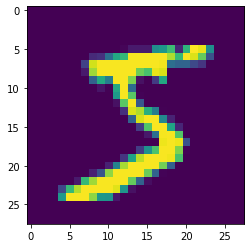

In [265]:
plt.imshow(x_train[0])

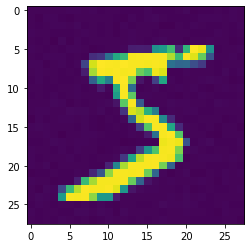

In [266]:
plt.imshow(x_train_noise[0])

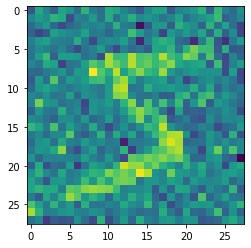

In [267]:
plt.imshow(x_train_100[0])

In [268]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [269]:
x_train_noise = x_train_noise.reshape(60000, 784)
x_test_noise = x_test_noise.reshape(10000, 784)
x_train_noise = x_train_noise.astype('float32')
x_test_noise = x_test_noise.astype('float32')
x_train_noise /= max(check_train)
x_test_noise /= max(check_test)
print(x_train_noise.shape[0], 'train samples')
print(x_test_noise.shape[0], 'test samples')

60000 train samples
10000 test samples


In [270]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_60 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 10s 21ms/step - loss: 0.4299 - accuracy: 0.8631 - val_loss:

In [271]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train_noise = keras.utils.to_categorical(y_train_noise, num_classes)
y_test_noise = keras.utils.to_categorical(y_test_noise, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise, y_train_noise,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise, y_test_noise))
score_noise = model.evaluate(x_test_noise, y_test_noise, verbose=0)
print('Test loss:', score_noise[0])
print('Test accuracy:', score_noise[1])

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_63 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 11s 21ms/step - loss: 0.4428 - accuracy: 0.8598 - val_loss:

In [272]:
x_train_100 = x_train_100.reshape(60000, 784)
x_test_100 = x_test_100.reshape(10000, 784)
x_train_100 = x_train_100.astype('float32')
x_test_100 = x_test_100.astype('float32')
x_train_100 /= max(check_train_100)
x_test_100 /= max(check_test_100)
print(x_train_100.shape[0], 'train samples')
print(x_test_100.shape[0], 'test samples')

60000 train samples
10000 test samples


In [273]:
x_train_10 = x_train_10.reshape(60000, 784)
x_test_10 = x_test_10.reshape(10000, 784)
x_train_10 = x_train_10.astype('float32')
x_test_10 = x_test_10.astype('float32')
x_train_10 /= max(check_train_10)
x_test_10 /= max(check_test_10)
print(x_train_10.shape[0], 'train samples')
print(x_test_10.shape[0], 'test samples')

60000 train samples
10000 test samples


In [274]:
x_train_50 = x_train_50.reshape(60000, 784)
x_test_50 = x_test_50.reshape(10000, 784)
x_train_50 = x_train_50.astype('float32')
x_test_50 = x_test_50.astype('float32')
x_train_50 /= max(check_train_50)
x_test_50 /= max(check_test_50)
print(x_train_50.shape[0], 'train samples')
print(x_test_50.shape[0], 'test samples')

60000 train samples
10000 test samples


In [275]:
x_train_200 = x_train_200.reshape(60000, 784)
x_test_200 = x_test_200.reshape(10000, 784)
x_train_200 = x_train_200.astype('float32')
x_test_200 = x_test_200.astype('float32')
x_train_200 /= max(check_train_200)
x_test_200 /= max(check_test_200)
print(x_train_200.shape[0], 'train samples')
print(x_test_200.shape[0], 'test samples')

60000 train samples
10000 test samples


In [276]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train_100 = keras.utils.to_categorical(y_train_100, num_classes)
y_test_100 = keras.utils.to_categorical(y_test_100, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_100, y_train_100,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_100, y_test_100))
score_100 = model.evaluate(x_test_100, y_test_100, verbose=0)
print('Test loss:', score_100[0])
print('Test accuracy:', score_100[1])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_64 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_65 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 11s 23ms/step - loss: 0.7034 - accuracy: 0.7735 - val_loss:

In [277]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train_10 = keras.utils.to_categorical(y_train_10, num_classes)
y_test_10 = keras.utils.to_categorical(y_test_10, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_10, y_train_10,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_10, y_test_10))
score_10 = model.evaluate(x_test_10, y_test_10, verbose=0)
print('Test loss:', score_10[0])
print('Test accuracy:', score_10[1])

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_66 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_67 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 12s 23ms/step - loss: 0.4450 - accuracy: 0.8575 - val_loss:

In [278]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train_50 = keras.utils.to_categorical(y_train_50, num_classes)
y_test_50 = keras.utils.to_categorical(y_test_50, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_50, y_train_50,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_50, y_test_50))
score_50 = model.evaluate(x_test_50, y_test_50, verbose=0)
print('Test loss:', score_50[0])
print('Test accuracy:', score_50[1])

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_68 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_69 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.5418 - accuracy: 0.8309 - val_loss:

In [279]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train_200 = keras.utils.to_categorical(y_train_200, num_classes)
y_test_200 = keras.utils.to_categorical(y_test_200, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_200, y_train_200,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_200, y_test_200))
score_200 = model.evaluate(x_test_200, y_test_200, verbose=0)
print('Test loss:', score_200[0])
print('Test accuracy:', score_200[1])

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_71 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 1.0607 - accuracy: 0.6462 - val_loss:

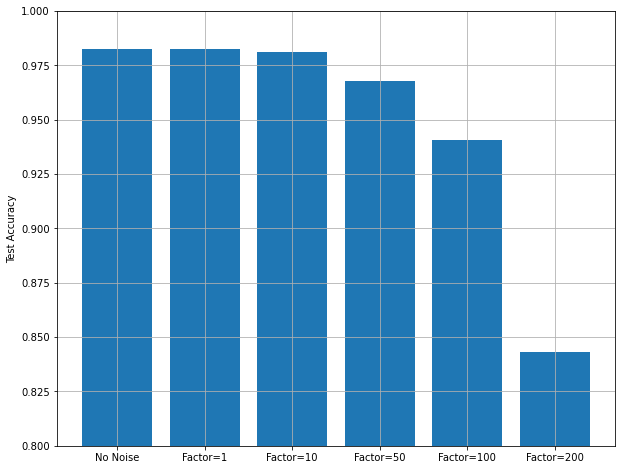

In [280]:
objects = ('No Noise', 'Factor=1', 'Factor=10', 'Factor=50', 
           'Factor=100', 'Factor=200')
scores =[score[1], score_noise[1], score_10[1], score_50[1], score_100[1], score_200[1]]
performance = np.arange(len(objects))
plt.figure(figsize=(10,8))
plt.bar(performance, scores)
plt.xticks(performance, objects)
plt.ylim([.80, 1])
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

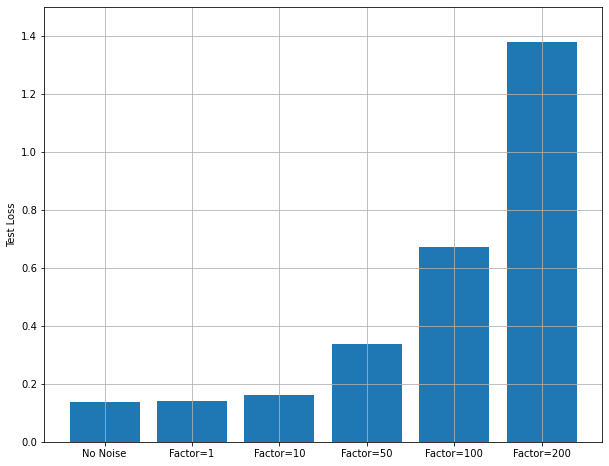

In [283]:
objects = ('No Noise', 'Factor=1', 'Factor=10', 'Factor=50', 
           'Factor=100', 'Factor=200')
scores =[score[0], score_noise[0], score_10[0], score_50[0], score_100[0], score_200[0]]
performance = np.arange(len(objects))
plt.figure(figsize=(10,8))
plt.bar(performance, scores)
plt.xticks(performance, objects)
plt.ylim([0, 1.5])
plt.ylabel("Test Loss")
plt.grid(True)
plt.show()